In [15]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
ppp = pd.read_csv('ppp_dataframe.csv')

In [5]:
ppp.columns

Index(['CountyID', 'Total Establishments', 'Labor_Force', 'Unemployment Rate',
       'Commuter Ratio', 'Average Weekly Wages', 'Total Pop',
       'Avg Total Working Adults/House', 'Self-Employment as % of Workforce',
       'Non-Employer Establishments as % of All Establishments', '101', '1011',
       '1012', '1013', '102', '1021', '1022', '1023', '1024', '1025', '1026',
       '1027', '1028', '1029', '11', '21', '22', '23', '31-33', '42', '51',
       '53', '54', '56', '61', '62', '71', '72', '81', '92', '99',
       '% of Total Population in the Labor Force', 'March Employment Numbers',
       'Jobs_Lost', 'April_Jobs', 'Job_Loss_Ratio', 'Number of Loans Received',
       'Total Amt of Loans Received'],
      dtype='object')

In [9]:
ppp['NEE/Workforce'] = ppp['Non-Employer Establishments as % of All Establishments'] * ppp['Total Establishments']/(ppp['Non-Employer Establishments as % of All Establishments'] * ppp['Total Establishments'] + ppp['March Employment Numbers'])


In [10]:
ppp

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,...,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Number of Loans Received,Total Amt of Loans Received,NEE/Workforce
0,13001,437,9574.0,3.7,0.761574,1241,18440,1.74,0.128298,0.728545,...,0.018117,0.002376,0.519197,7024,441,6583,0.062785,776,3.791913e+07,0.043361
1,13003,125,4584.0,3.2,0.502479,712,8239,1.81,0.125266,0.818444,...,0.018684,0.000406,0.556378,2230,223,2007,0.100000,387,1.850347e+07,0.043865
2,13005,270,4928.0,3.7,0.775601,700,11201,1.83,0.129900,0.700552,...,0.002428,0.000000,0.439961,3681,-46,3727,-0.012497,589,2.577633e+07,0.048874
3,13007,63,1229.0,4.4,0.373617,714,3132,1.36,0.164512,0.756863,...,0.010941,0.008753,0.392401,439,7,432,0.015945,189,4.090794e+06,0.097974
4,13009,859,18253.0,4.3,0.899468,677,45111,1.95,0.180389,0.788138,...,0.027431,0.001610,0.404624,15720,1485,14235,0.094466,1821,5.967474e+07,0.041289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,13313,2340,44176.0,3.9,1.333828,900,104237,1.87,0.139889,0.722327,...,0.010449,0.001226,0.423803,56653,8868,47785,0.156532,2311,2.210168e+08,0.028971
155,13315,110,2825.0,3.9,0.418939,618,8824,2.36,0.196286,0.824806,...,0.005440,0.001813,0.320150,1137,36,1101,0.031662,435,8.267156e+06,0.073900
156,13317,239,3826.0,5.5,0.727122,669,9844,1.53,0.172047,0.731762,...,0.030022,0.000000,0.388663,2630,210,2420,0.079848,400,1.986119e+07,0.062352
157,13319,171,3984.0,3.6,0.901067,807,9010,1.79,0.164576,0.794994,...,0.000273,0.000000,0.442175,3461,416,3045,0.120196,380,1.748327e+07,0.037794


In [19]:
y = ppp['Total Amt of Loans Received']

In [105]:
x1 = ppp[['March Employment Numbers']]

In [106]:
slr = LinearRegression().fit(x1, y)
slr_r2 = slr.score(x1, y)
adj_r2_baseline = 1 - (1-slr_r2)*(len(y)-1)/(len(y)-x1.shape[1]-1)
adj_r2_baseline

0.9877193034446502

In [20]:
x4 = ppp[['March Employment Numbers', 'NEE/Workforce']]
baseline_model_current = LinearRegression().fit(x4, y)

In [21]:
baseline_r2 = baseline_model_current.score(x4, y)
baseline_pred = baseline_model_current.predict(x4)
baseline_mape = metrics.mean_absolute_percentage_error(y, baseline_pred)

In [22]:
baseline_mape

1.5954891186641886

In [23]:
baseline_r2
adj_r2_baseline = 1 - (1-baseline_r2)*(len(y)-1)/(len(y)-x4.shape[1]-1)
adj_r2_baseline

0.9896609499544948

In [24]:
x5 = ppp[['March Employment Numbers', 'NEE/Workforce', 'Average Weekly Wages']]
model_plus_wages = LinearRegression().fit(x5, y)

In [25]:
new_r2 = model_plus_wages.score(x5, y)
new_pred = model_plus_wages.predict(x5)
new_mape = metrics.mean_absolute_percentage_error(y, new_pred)

In [26]:
new_adj_r2 = 1 - (1-new_r2)*(len(y)-1)/(len(y)-x5.shape[1]-1)
new_adj_r2

0.9895992016843891

In [27]:
new_mape

1.6023652794920893

In [28]:
ppp

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,...,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Number of Loans Received,Total Amt of Loans Received,NEE/Workforce
0,13001,437,9574.0,3.7,0.761574,1241,18440,1.74,0.128298,0.728545,...,0.018117,0.002376,0.519197,7024,441,6583,0.062785,776,3.791913e+07,0.043361
1,13003,125,4584.0,3.2,0.502479,712,8239,1.81,0.125266,0.818444,...,0.018684,0.000406,0.556378,2230,223,2007,0.100000,387,1.850347e+07,0.043865
2,13005,270,4928.0,3.7,0.775601,700,11201,1.83,0.129900,0.700552,...,0.002428,0.000000,0.439961,3681,-46,3727,-0.012497,589,2.577633e+07,0.048874
3,13007,63,1229.0,4.4,0.373617,714,3132,1.36,0.164512,0.756863,...,0.010941,0.008753,0.392401,439,7,432,0.015945,189,4.090794e+06,0.097974
4,13009,859,18253.0,4.3,0.899468,677,45111,1.95,0.180389,0.788138,...,0.027431,0.001610,0.404624,15720,1485,14235,0.094466,1821,5.967474e+07,0.041289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,13313,2340,44176.0,3.9,1.333828,900,104237,1.87,0.139889,0.722327,...,0.010449,0.001226,0.423803,56653,8868,47785,0.156532,2311,2.210168e+08,0.028971
155,13315,110,2825.0,3.9,0.418939,618,8824,2.36,0.196286,0.824806,...,0.005440,0.001813,0.320150,1137,36,1101,0.031662,435,8.267156e+06,0.073900
156,13317,239,3826.0,5.5,0.727122,669,9844,1.53,0.172047,0.731762,...,0.030022,0.000000,0.388663,2630,210,2420,0.079848,400,1.986119e+07,0.062352
157,13319,171,3984.0,3.6,0.901067,807,9010,1.79,0.164576,0.794994,...,0.000273,0.000000,0.442175,3461,416,3045,0.120196,380,1.748327e+07,0.037794


In [29]:
ppp['high dens'] = ppp['Total Pop'] > 500000

In [30]:
ppp['import'] = ppp['Commuter Ratio'] > 1

In [31]:
ppp['import'] = ppp['import'].astype(int)
ppp['high dens'] = ppp['high dens'].astype(int)

In [32]:
x6 = ppp[['March Employment Numbers', 'NEE/Workforce', 'high dens']]
model_plus_dens = LinearRegression().fit(x6, y)

In [33]:
new_r2 = model_plus_dens.score(x6, y)
new_pred = model_plus_dens.predict(x6)
new_mape = metrics.mean_absolute_percentage_error(y, new_pred)

In [34]:
new_adj_r2 = 1 - (1-new_r2)*(len(y)-1)/(len(y)-x6.shape[1]-1)
new_adj_r2

0.9943908277381152

In [35]:
new_mape

1.0980881177587987

In [36]:
ppp['Employment*Dens'] = ppp['March Employment Numbers'] * ppp['high dens']

In [37]:
ppp['NEE*Dens'] = ppp['NEE/Workforce'] * ppp['high dens']

In [38]:
x8 = ppp[['March Employment Numbers', 'NEE/Workforce', 'high dens', 'Employment*Dens']]

In [39]:
model_plus_interact = LinearRegression().fit(x8, y)

In [40]:
new_r2 = model_plus_interact.score(x8, y)
new_pred = model_plus_interact.predict(x8)
new_mape = metrics.mean_absolute_percentage_error(y, new_pred)

In [42]:
new_adj_r2 = 1 - (1-new_r2)*(len(y)-1)/(len(y)-x8.shape[1]-1)
new_adj_r2

0.9949242951121597

In [43]:
new_mape

0.8736190649165771

In [45]:
x7 = ppp[['March Employment Numbers', 'NEE/Workforce', 'high dens', 'NEE*Dens', 'Employment*Dens']]
model_plus_import = LinearRegression().fit(x7, y)

In [46]:
new_r2 = model_plus_import.score(x7, y)
new_pred = model_plus_import.predict(x7)
new_mape = metrics.mean_absolute_percentage_error(y, new_pred)

In [47]:
new_adj_r2 = 1 - (1-new_r2)*(len(y)-1)/(len(y)-x7.shape[1]-1)
new_adj_r2

0.9955975504010538

In [48]:
new_mape

0.8180709346983837

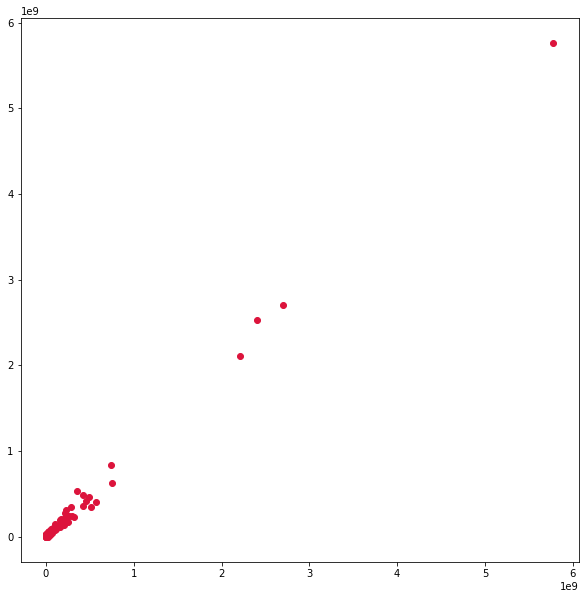

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.scatter(y, new_pred, c = 'crimson')


In [52]:
per_error = []
for i in range(len(y)):
    per_error.append((y[i] - new_pred[i])/y[i])

In [61]:
resid = []
for i in range(len(y)):
    resid.append(y[i] - new_pred[i])

In [63]:
abs_per_error = map(abs,per_error)
import statistics as stat
stat.mean(abs_per_error)

0.8180709346983838

In [74]:
import numpy as np
arr = np.array(per_error)
abs_array = np.absolute(arr)
np.percentile(abs_array, 99)

9.35848982209575

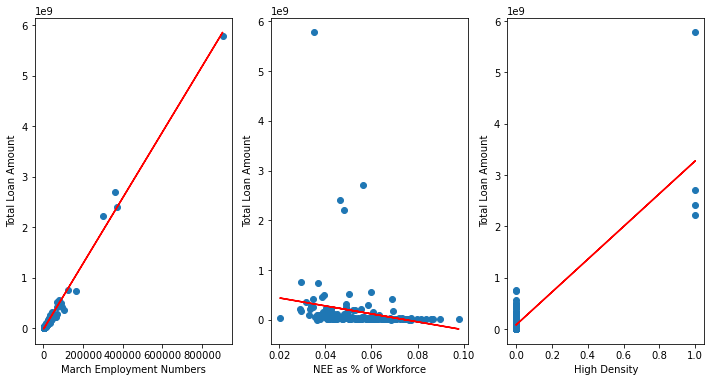

In [101]:
import scipy.stats as stats
import matplotlib.pyplot as plt

#check scatterplots of included variables to see what the issue might be 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

# Plot the first scatterplot
slope, intercept, r_value, p_value, std_err = stats.linregress(x7.iloc[:, 0], y)
line = slope * x7.iloc[:, 0] + intercept
ax1.scatter(x7.iloc[:, 0], y)
ax1.plot(x7.iloc[:, 0], line, color='red')
ax1.set_xlabel('March Employment Numbers')
ax1.set_ylabel('Total Loan Amount')

# Plot the second scatterplot
slope, intercept, r_value, p_value, std_err = stats.linregress(x7.iloc[:, 1], y)
line = slope * x7.iloc[:, 1] + intercept
ax2.scatter(x7.iloc[:, 1], y)
ax2.plot(x7.iloc[:, 1], line, color='red')
ax2.set_xlabel('NEE as % of Workforce')
ax2.set_ylabel('Total Loan Amount')

# Plot the third scatterplot
slope, intercept, r_value, p_value, std_err = stats.linregress(x7.iloc[:, 2], y)
line = slope * x7.iloc[:, 2] + intercept
ax3.scatter(x7.iloc[:, 2], y)
ax3.plot(x7.iloc[:, 2], line, color='red')
ax3.set_xlabel('High Density')
ax3.set_ylabel('Total Loan Amount')



# Show the plots
plt.show()

In [7]:
ppp[ppp['Total Pop'] > 1000000]

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,...,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Number of Loans Received,Total Amt of Loans Received
59,13121,46399,569635.0,3.5,1.642852,1791,1036200,1.75,0.206814,0.710191,...,0.027953,0.018196,0.002314,0.549735,903424,120977,782447,0.133909,102263,5.777318e+09


In [75]:
small_counties = ppp[ppp['high dens'] == 0]
large_counties = ppp[ppp['high dens'] == 1]

In [76]:
x_small = small_counties[['March Employment Numbers', 'NEE/Workforce']]
y_small = small_counties['Total Amt of Loans Received']

In [77]:
x_large = large_counties[['March Employment Numbers', 'NEE/Workforce']]
y_large = large_counties['Total Amt of Loans Received']

In [78]:
small_model = LinearRegression().fit(x_small, y_small)
large_model = LinearRegression().fit(x_large, y_large)

In [79]:
r2_small = small_model.score(x_small, y_small)
small_pred = small_model.predict(x_small)
small_mape = metrics.mean_absolute_percentage_error(y_small, small_pred)

In [80]:
small_mape

0.8385278819679605

In [81]:
r2_large = large_model.score(x_large, y_large)
large_pred = large_model.predict(x_large)
large_mape = metrics.mean_absolute_percentage_error(y_large, large_pred)

In [82]:
large_mape

0.025364216293051616

In [84]:
sorted_array = np.sort(abs_array)

In [85]:
sorted_array

array([1.13433033e-03, 2.45325311e-03, 3.58531072e-03, 8.74877073e-03,
       1.27722876e-02, 1.81810716e-02, 2.93948383e-02, 3.00831754e-02,
       3.39080662e-02, 3.52686700e-02, 3.79229845e-02, 3.94240394e-02,
       4.38048876e-02, 4.42987442e-02, 4.73610355e-02, 4.85982649e-02,
       4.92710169e-02, 4.93237013e-02, 5.25091703e-02, 5.90852333e-02,
       5.97412304e-02, 6.49560566e-02, 6.52886452e-02, 6.85920011e-02,
       7.03858341e-02, 7.83218468e-02, 8.23989449e-02, 8.47242286e-02,
       8.83626818e-02, 9.56636673e-02, 9.59658049e-02, 9.74251213e-02,
       1.00019844e-01, 1.00568594e-01, 1.01991349e-01, 1.02295745e-01,
       1.04589298e-01, 1.06270383e-01, 1.08810844e-01, 1.15595090e-01,
       1.21360103e-01, 1.26159110e-01, 1.33223349e-01, 1.34497998e-01,
       1.34783380e-01, 1.34851712e-01, 1.37253593e-01, 1.41765502e-01,
       1.42433032e-01, 1.54140860e-01, 1.54976028e-01, 1.55635154e-01,
       1.56628029e-01, 1.57326791e-01, 1.58627097e-01, 1.63886599e-01,
      

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor().fit(x7, y)
rf_pred = rf_model.predict(x7)
rf_mape = metrics.mean_absolute_percentage_error(y, rf_pred)

In [87]:
rf_mape

0.13213740589582024

In [107]:
rf = RandomForestRegressor()
reg = LinearRegression()
rfscore = cross_val_score(rf, x7, y, scoring='neg_mean_absolute_percentage_error', cv=159)
regscore = cross_val_score(reg, x7, y, scoring='neg_mean_absolute_percentage_error', cv=159)


In [108]:
import statistics as stat
stat.mean(rfscore)

-0.3635955969088965

In [109]:
stat.mean(regscore)

-0.8635803189405229

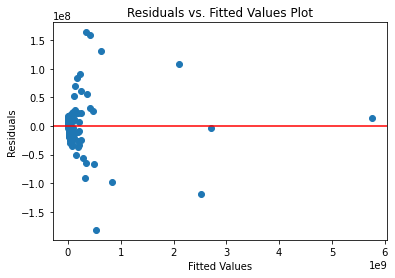

In [110]:
# Create a residuals vs. fitted values plot

fig, ax = plt.subplots()
ax.scatter(new_pred, resid)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values Plot')
plt.show()

In [111]:
rf_resid = []
for i in range(len(y)):
    rf_resid.append(y[i] - rf_pred[i])

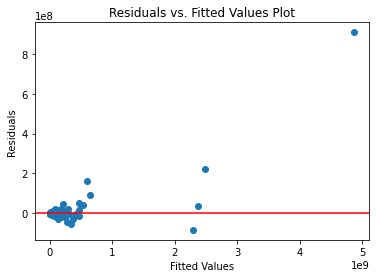

In [112]:
# Create a residuals vs. fitted values plot

fig, ax = plt.subplots()
ax.scatter(rf_pred, rf_resid)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values Plot')
plt.show()

In [116]:
rf_model_large = RandomForestRegressor().fit(x_large, y_large)
reg_model_large = LinearRegression().fit(x_large, y_large)
rf_model_small = RandomForestRegressor().fit(x_small, y_small)
reg_model_small = LinearRegression().fit(x_small, y_small)

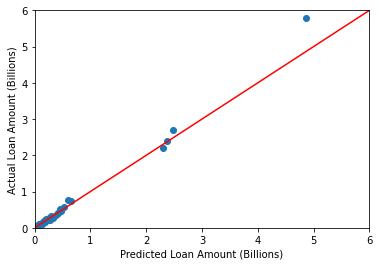

In [132]:
fig, ax = plt.subplots()
ax.scatter(rf_pred/1000000000, y/1000000000)
ax.set_xlabel('Predicted Loan Amount (Billions)')
ax.set_ylabel('Actual Loan Amount (Billions)') 
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.axline((0, 0), slope=1, color = 'red')

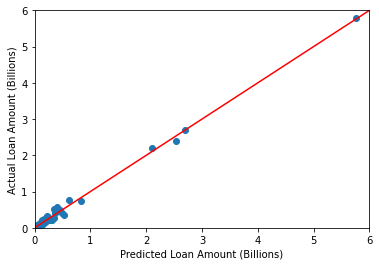

In [133]:
fig, ax = plt.subplots()
ax.scatter(new_pred/1000000000, y/1000000000)
ax.set_xlabel('Predicted Loan Amount (Billions)')
ax.set_ylabel('Actual Loan Amount (Billions)') 
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.axline((0, 0), slope=1, color = 'red')

In [117]:
rf_large_pred = rf_model_large.predict(x_large)
reg_large_pred = reg_model_large.predict(x_large)
rf_small_pred = rf_model_small.predict(x_small)
reg_small_pred = reg_model_small.predict(x_small)
rf_mape_large = metrics.mean_absolute_percentage_error(y_large, rf_large_pred)
reg_mape_large = metrics.mean_absolute_percentage_error(y_large, reg_large_pred)
rf_mape_small = metrics.mean_absolute_percentage_error(y_small, rf_small_pred)
reg_mape_small = metrics.mean_absolute_percentage_error(y_small, reg_small_pred)



In [121]:
rf_mape_large

0.07013173843249415